In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

%matplotlib inline

In [19]:
def label(ax, string):
    ax.annotate(string, (1, 1), xytext=(-8, -8), ha='right', va='top',
                size=14, xycoords='axes fraction', textcoords='offset points')
    
def acorr(x, ax=None):
    if ax is None:
        ax = plt.gca()

    x = x - x.mean()

    autocorr = np.correlate(x, x, mode='full')
    autocorr = autocorr[x.size:]
    autocorr /= (1e-10 + autocorr.max())
    print(np.sum(autocorr))

    return ax.stem(autocorr)
    
def calculate_ess(data):
    num_samples = data.shape[0]
    fig, axes = plt.subplots(nrows=4, figsize=(8, 12))
    fig.tight_layout()

    axes[0].plot(data)
    label(axes[0], 'Raw Data')

    _, c, _, _ = axes[1].acorr(data, maxlags=data.size-1)
    label(axes[1], 'Matplotlib Autocorrelation')

#     tsaplots.plot_acf(data, axes[2])
#     label(axes[2], 'Statsmodels Autocorrelation')

    a = pd.tools.plotting.autocorrelation_plot(data, ax=axes[2])
    label(axes[2], 'Pandas Autocorrelation')
    
    acorr(data, axes[3])
    label(axes[3], 'self-defined')

    # Remove some of the titles and labels that were automatically added
    for ax in axes.flat:
        ax.set(title='', xlabel='')
    plt.show()

    return num_samples / (1 + 2 * sum(c[c.size/2:]))

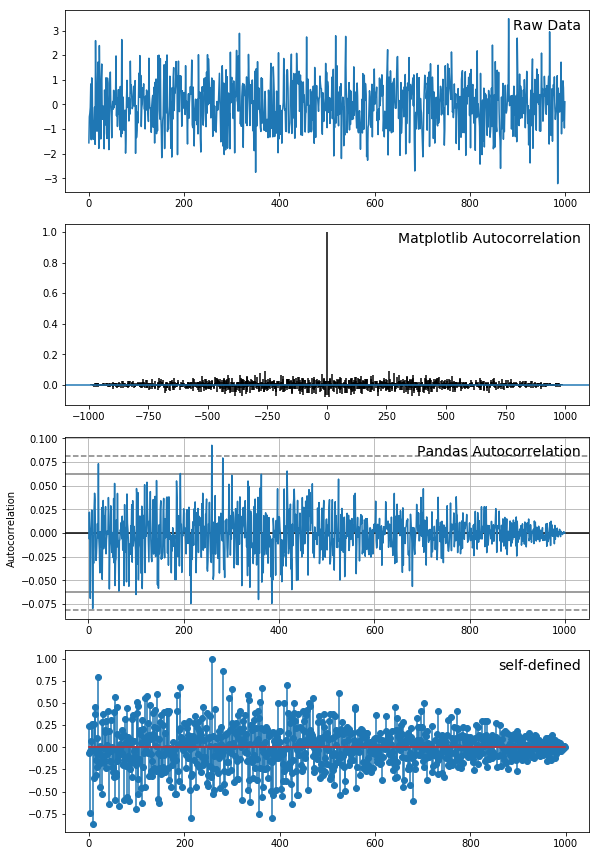

472.68244374828754


In [15]:
np.random.seed()
samples = np.random.normal(size=1000)

print(calculate_ess(samples))

AxesSubplot(0.0584635,0.279051;0.909006x0.210069)


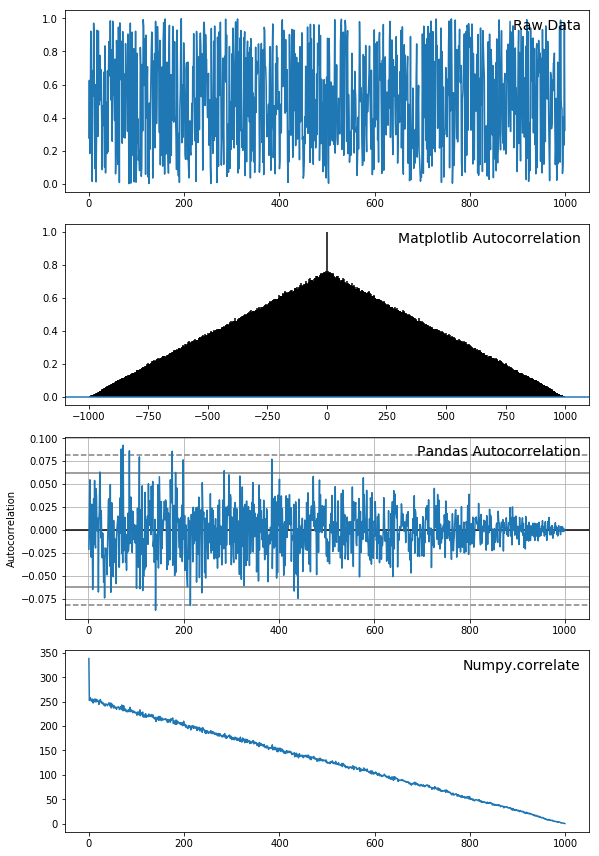

1.3270969386357212


In [11]:
np.random.seed()
samples = np.random.uniform(size=1000)

print(calculate_ess(samples))

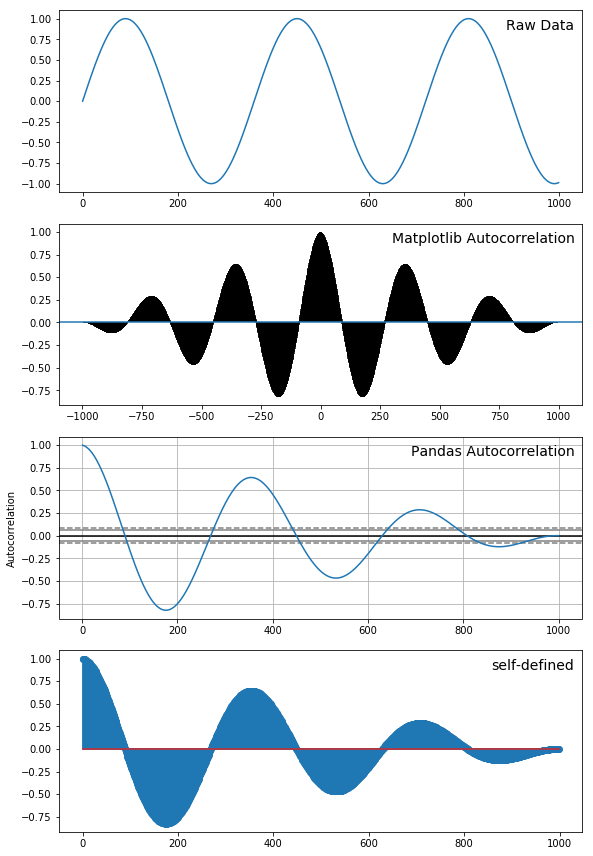

152.9791626631384


In [16]:
np.random.seed()
samples = np.sin(np.arange(1000) * np.pi / 180. )

print(calculate_ess(samples))

0.0


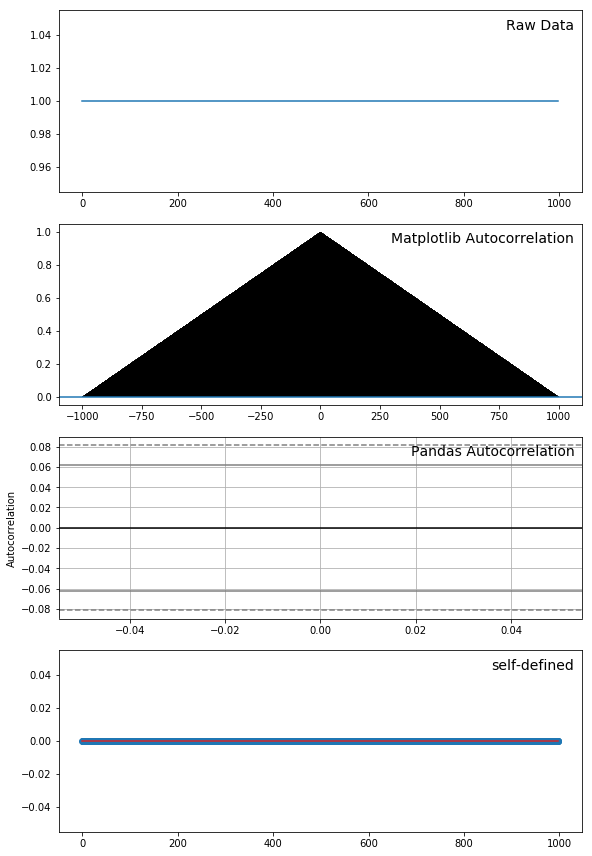

0.9980039920159679


In [20]:
np.random.seed()
samples = np.ones((1000,))

print(calculate_ess(samples))

In [3]:
if os.path.isfile("samples/MH_4000_10000_4262.npy"):
    print("Loading from local")
    np_array = np.load("samples/MH_4000_10000_4262.npy")

print(np_array.shape)

Loading from local
(6001, 10)


[-6.27745888 -6.27745888 -6.27745888 ... -6.25304735 -6.25304735
 -6.26511791]
-0.5084075478129151


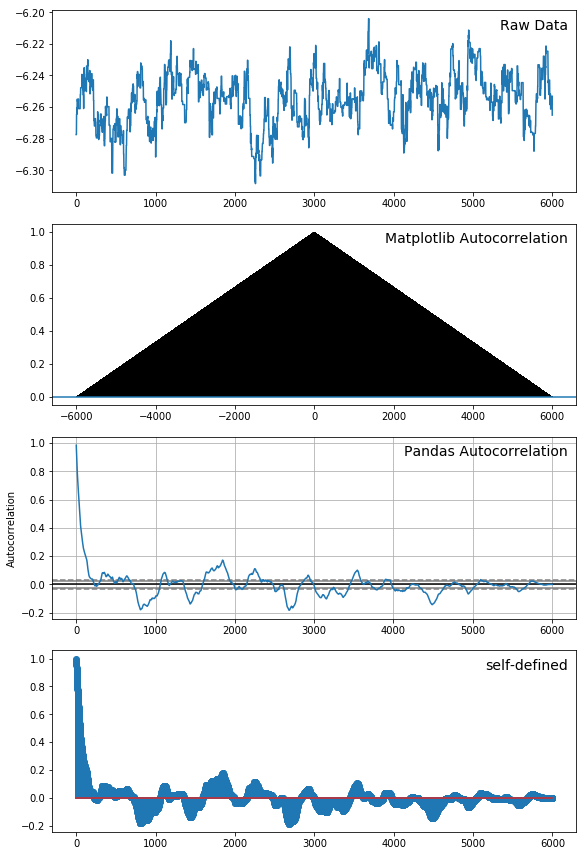

0.999673683739625
[-0.70145764 -0.70145764 -0.70145764 ... -0.75633922 -0.75633922
 -0.75606757]
-0.5063169601398556


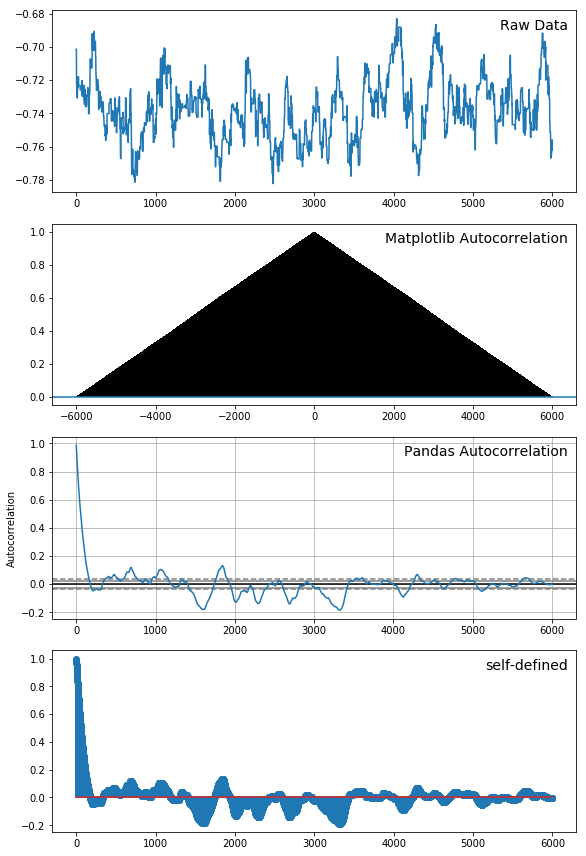

1.0002845883170761
[-0.21488795 -0.21488795 -0.21488795 ... -0.21868711 -0.21868711
 -0.22059876]
-0.5109585141857451


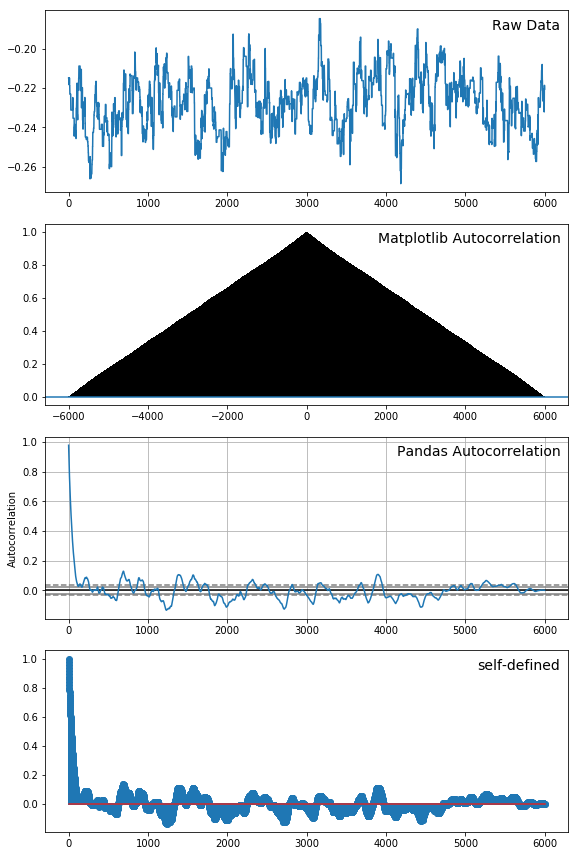

1.003464044383883
[0.6016034  0.6016034  0.6016034  ... 0.56069354 0.56069354 0.55791812]
-0.5049586986863588


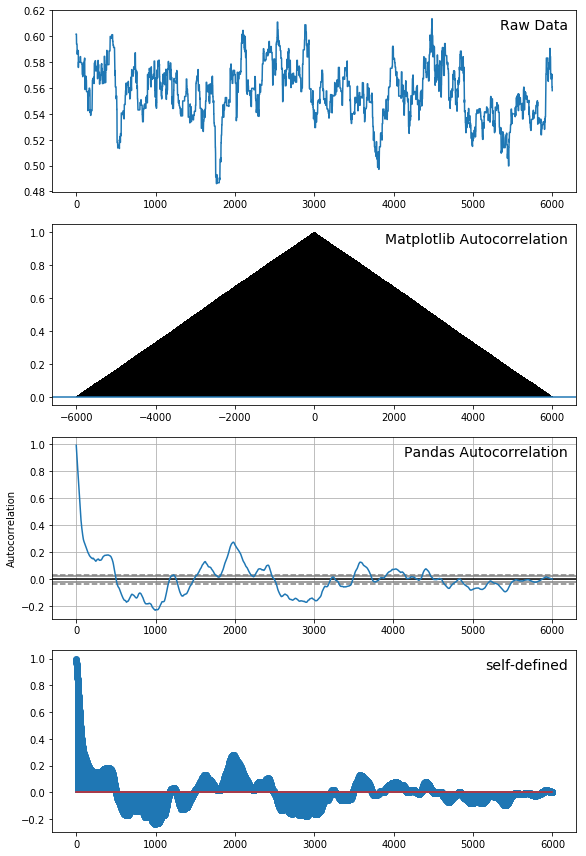

1.0011025315311013
[0.04516629 0.04516629 0.04516629 ... 0.03545304 0.03545304 0.03209458]
-0.6112009794052056


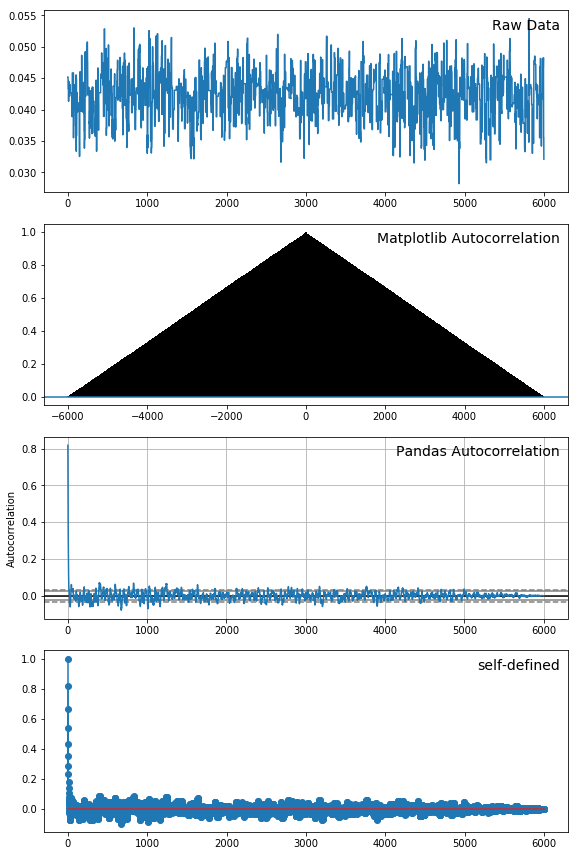

1.0071439084793397
[0.04954732 0.04954732 0.04954732 ... 0.05003886 0.05003886 0.04869035]
-0.5011733848595554


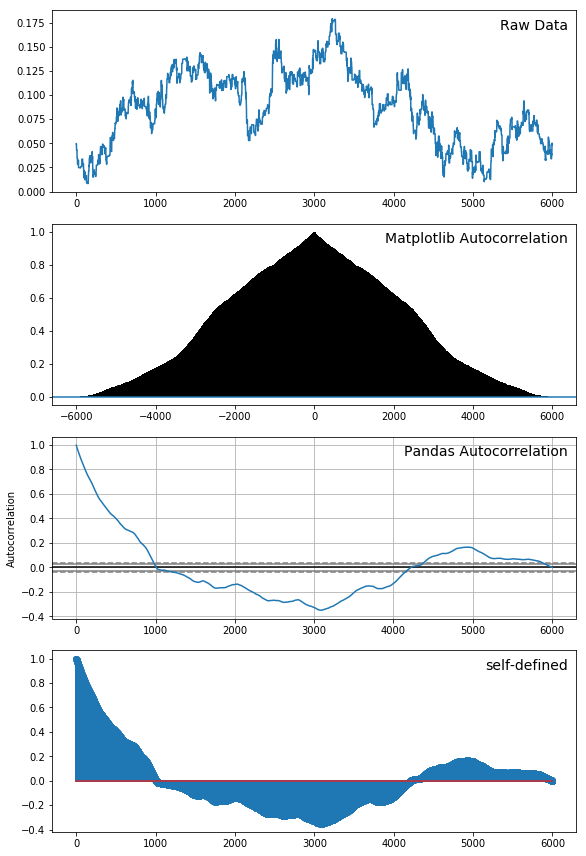

1.1898767129792374
[0.04575601 0.04575601 0.04575601 ... 0.05777304 0.05777304 0.06020603]
-0.5411362406749927


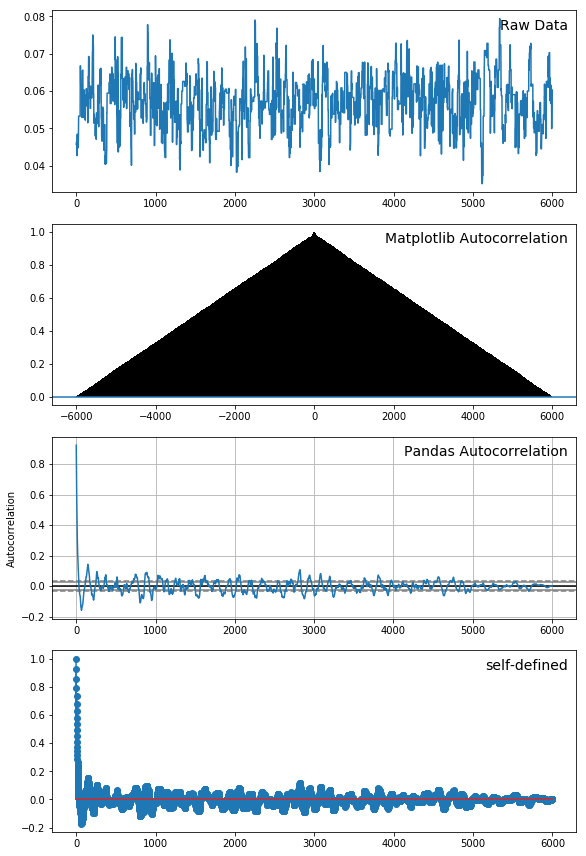

1.0142009537155543
[-0.05633628 -0.05633628 -0.05633628 ... -0.0790006  -0.0790006
 -0.08489599]
-0.5097034501595967


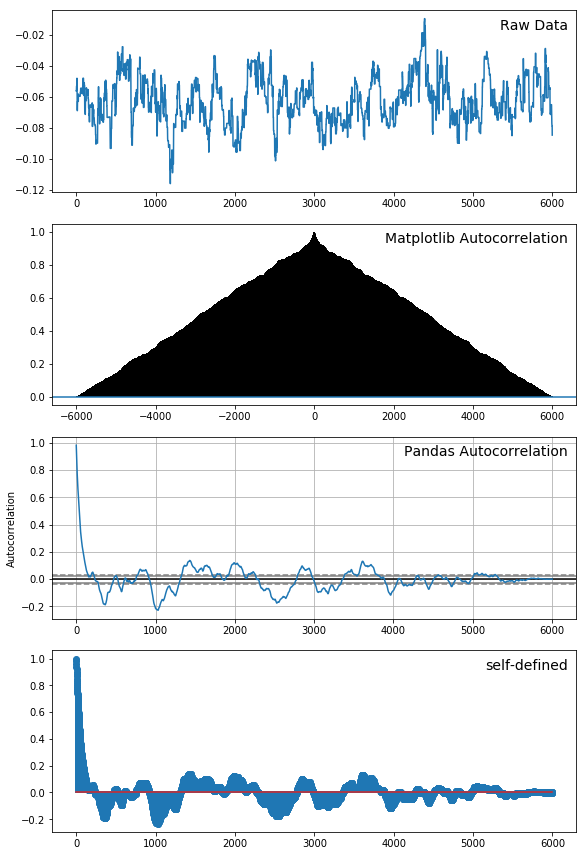

1.0580414052145548
[0.07516599 0.07516599 0.07516599 ... 0.09057754 0.09057754 0.0842604 ]
-0.5012321007689593


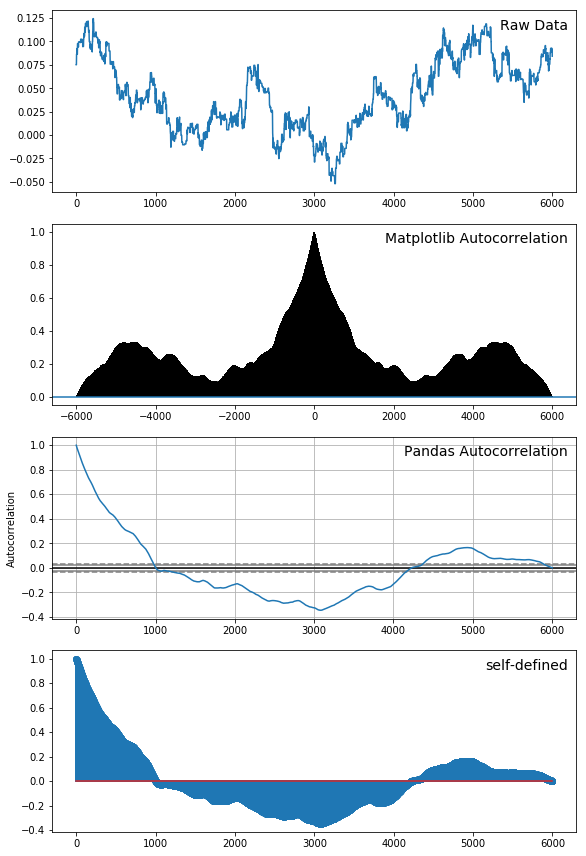

1.8168093341626588
[0.2920914  0.2920914  0.2920914  ... 0.28108746 0.28108746 0.28657111]
-0.5174382604450285


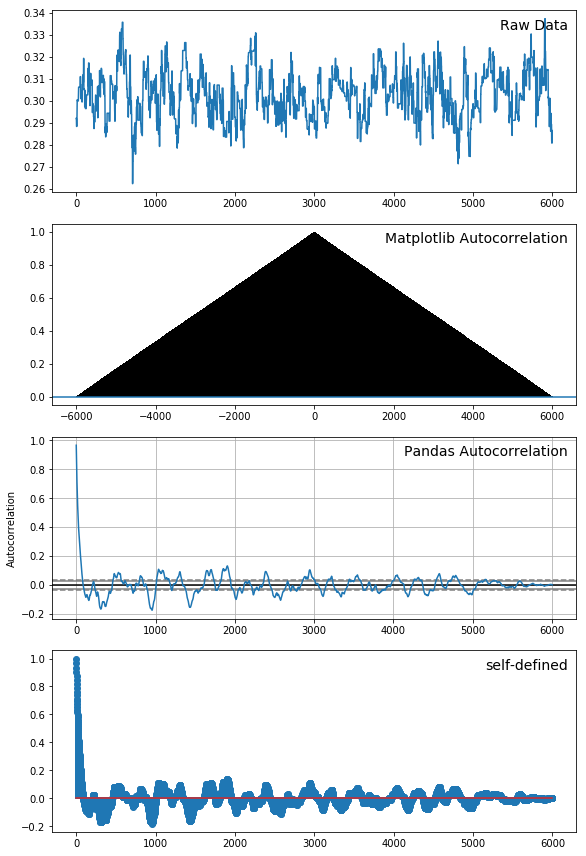

1.0009158689842133


In [22]:
for i in range(10):
    samples = np_array[:, i]
    print(samples)
    print(calculate_ess(samples))
    plt.close()